<a href="https://colab.research.google.com/github/Oxpol85/Data-Base-Challenge-Juan-shop/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [37]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [54]:
tienda = pd.concat([tienda, tienda_2,tienda_3,tienda_4])
tienda = tienda.drop(['lat', 'lon'], axis=1)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1


In [97]:
# Set locale for currently format
tienda["Precio"] = tienda["Precio"].round(0).astype(int)
tienda['Costo de envío'] = tienda ['Costo de envío'].round(0).astype(int)
tienda_2["Precio"] = tienda_2["Precio"].round(0).astype(int)
tienda_2['Costo de envío'] = tienda_2 ['Costo de envío'].round(0).astype(int)
tienda_3["Precio"] = tienda_3["Precio"].round(0).astype(int)
tienda_3['Costo de envío'] = tienda_3 ['Costo de envío'].round(0).astype(int)
tienda_4["Precio"] = tienda_4["Precio"].round(0).astype(int)
tienda_4['Costo de envío'] = tienda_4 ['Costo de envío'].round(0).astype(int)

# The sum sales stock vs (price-shiping cost) iquial net values operating
sumaVentas = tienda["Precio"].sum()
suma_Ventas = tienda["Costo de envío"].sum()
# Fix: Correctly format the output string using f-strings
print(f"Total tienda es: ${sumaVentas-suma_Ventas:n},COP")
sumaVentas2 = tienda_2["Precio"].sum()
suma_Ventas2 = tienda_2["Costo de envío"].sum()
# Fix: Correctly format the output string using f-strings
print(f"Total tienda_2 es: ${sumaVentas2-suma_Ventas2:n},COP")
sumaVentas3 = tienda_3["Precio"].sum()
suma_Ventas3 = tienda_3["Costo de envío"].sum()
print(f"Total tienda_3 es: ${sumaVentas3-suma_Ventas3:n},COP")
sumaVentas4 = tienda_4["Precio"].sum()
suma_Ventas4 = tienda_4["Costo de envío"].sum()
print(f"Total tienda_4 es: ${sumaVentas4-suma_Ventas4:n},COP")

Total tienda es: $1,089,502,500,COP
Total tienda_2 es: $1,056,858,400,COP
Total tienda_3 es: $1,039,503,000,COP
Total tienda_4 es: $983,058,300,COP


In [104]:
# Calculate the total net sales
TotalNeto = (sumaVentas - suma_Ventas) + (sumaVentas2 - suma_Ventas2) + (sumaVentas3 - suma_Ventas3) + (sumaVentas4 - suma_Ventas4)

print(f"Total tiendas es: ${TotalNeto:n},COP")

Total tiendas es: $4,168,922,200,COP


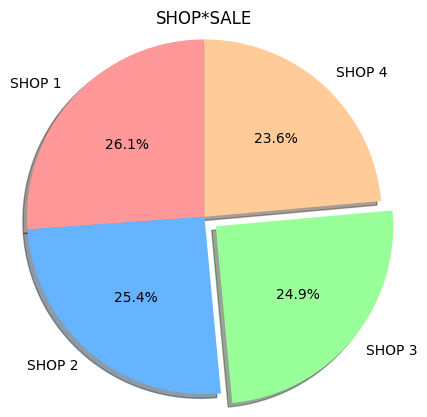

In [133]:
# Coming soon we can apreciate grafic information por more clearance by Stock discriminate
import matplotlib.pyplot as plt
import numpy as np

labels = ['SHOP 1', 'SHOP 2', 'SHOP 3', 'SHOP 4']
# Use the calculated total net sales for each store as numerical values
values = [(sumaVentas - suma_Ventas), (sumaVentas2 - suma_Ventas2), (sumaVentas3 - suma_Ventas3), (sumaVentas4 - suma_Ventas4)]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(values, labels=labels, colors=colors,
        startangle=90, shadow=True, explode=(0, 0, 0.1, 0),
        radius=1.2, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title("SHOP*SALE")

# Display the plot
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda